# **Importing The Dataset**

In [1]:
import pandas as pd
df = pd.read_csv('tweet_degree.csv')
print(df)

     Sl_No.                  name  followers
0         1         GunsandCoffee        640
1         2    Abu Layth Al Hindi         68
2         3    ابو الدرداء #خلافة        904
3         4  abu baker aldimashqi        112
4         5             IS_BAQIYA         25
..      ...                   ...        ...
311     312           Anaksabil97        238
312     313          Mountain Man        427
313     314         Sabil Ghoraba         71
314     315             wayf44rer        268
315     316                    ☝️         81

[316 rows x 3 columns]


In [2]:
degree_list= df["followers"].tolist()
degree_list= degree_list[0:21]
print(degree_list)

[640, 68, 904, 112, 25, 119, 823, 324, 328, 362, 350, 130, 128, 427, 92, 623, 742, 52, 50, 24, 2121]


In [0]:
!pip install networkx

# **Creating the Random Graph**

In [0]:
import networkx as nx
#https://networkx.github.io/documentation/networkx-1.10/reference/generated/networkx.generators.degree_seq.configuration_model.html#networkx.generators.degree_seq.configuration_model
from networkx.utils import powerlaw_sequence
#z=nx.utils.create_degree_sequence(100,powerlaw_sequence)
G=nx.configuration_model(degree_list)
G=nx.Graph(G)

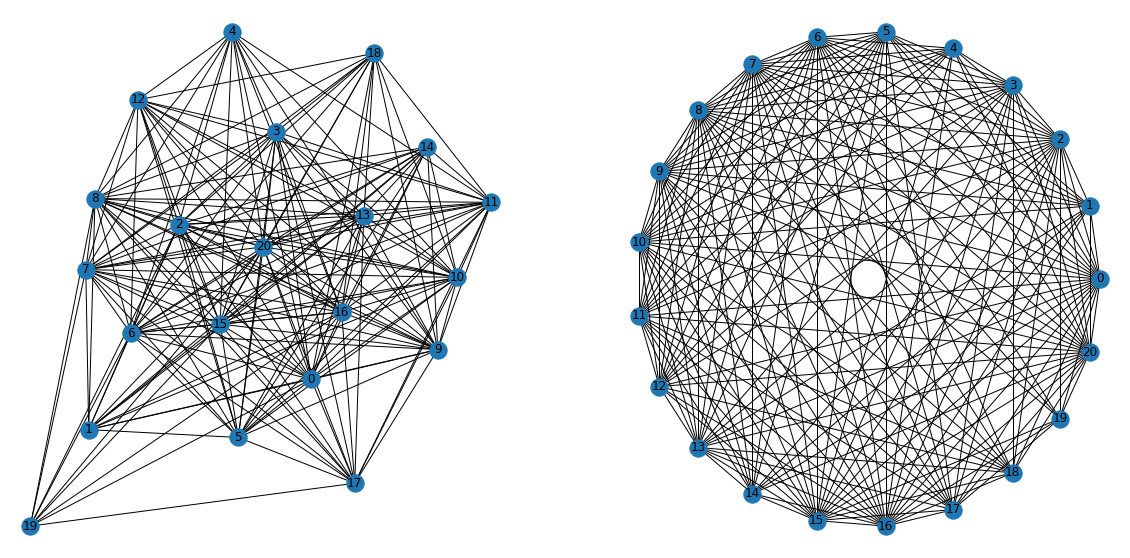

In [4]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20,10))
plt.subplot(121)
nx.draw(G, with_labels=True)
plt.subplot(122)
nx.draw_shell(G, with_labels=True)

In [0]:
from networkx.algorithms import approximation as aprx
max_clique = G.subgraph(aprx.max_clique(G))

In [6]:
density = nx.density(G)
print("Network density:", density)

Network density: 0.9238095238095239


# **Centrality Measures**


In [7]:
betweenness_dict = nx.betweenness_centrality(G) # Run betweenness centrality
eigenvector_dict = nx.eigenvector_centrality(G) # Run eigenvector centrality
katz_dict = nx.katz_centrality_numpy(G) # Run katz centrality
closeness_dict = nx.closeness_centrality(G) #Find Closeness Centrality
print(betweenness_dict)
print(eigenvector_dict)
print(katz_dict)
print(closeness_dict)

{0: 0.01446522775470144, 1: 0.0, 2: 0.01446522775470144, 3: 0.0028099093888567577, 4: 0.0, 5: 0.003311162521688838, 6: 0.01446522775470144, 7: 0.01446522775470144, 8: 0.01446522775470144, 9: 0.007666982140666351, 10: 0.007666982140666351, 11: 0.004941549678391784, 12: 0.0015905147484094851, 13: 0.0050090260616576406, 14: 0.00040485829959514174, 15: 0.01446522775470144, 16: 0.01446522775470144, 17: 0.003508771929824562, 18: 0.0, 19: 0.0, 20: 0.01446522775470144}
{0: 0.24521815649684192, 1: 0.16574859132767486, 2: 0.24521815649684192, 3: 0.2089411809079186, 4: 0.1675335668474561, 5: 0.20872476600072232, 6: 0.24521815649684192, 7: 0.24521815649684192, 8: 0.24521815649684192, 9: 0.2388980255921626, 10: 0.2388980255921626, 11: 0.2299072530783123, 12: 0.210172486890179, 13: 0.2298104423513911, 14: 0.17757784247033145, 15: 0.24521815649684192, 16: 0.24521815649684192, 17: 0.18624084706769747, 18: 0.1799992272987388, 19: 0.11651374255104051, 20: 0.24521815649684192}
{0: 0.2556736105107729, 1: 

# **Terrorist Random Graph Properties**

In [8]:
#Average Shortest Path Length
nx.average_shortest_path_length(G)

1.138095238095238

In [9]:
#Diameter
nx.diameter(G, e=None, usebounds=False)

2

In [10]:
#Clustering Coefficient
nx.average_clustering(G)

0.9142761423057754

In [0]:
#nx.max_clique(G)

In [14]:
#Degree Centrality
nx.degree_centrality(G)

{0: 1.1,
 1: 0.65,
 2: 1.1,
 3: 0.8500000000000001,
 4: 0.65,
 5: 0.8500000000000001,
 6: 1.1,
 7: 1.1,
 8: 1.1,
 9: 1.05,
 10: 1.05,
 11: 1.0,
 12: 0.9,
 13: 1.0,
 14: 0.7000000000000001,
 15: 1.1,
 16: 1.1,
 17: 0.75,
 18: 0.7000000000000001,
 19: 0.45,
 20: 1.1}

In [16]:
#Average Node Degree
average_degree=(G.number_of_edges()/len(degree_list))
print(average_degree)

9.238095238095237


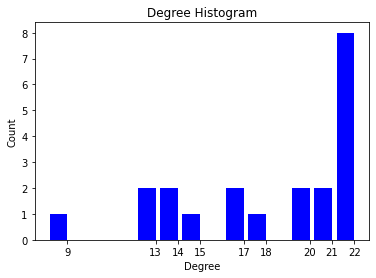

In [17]:
#Degree Distribution
import collections
import matplotlib.pyplot as plt
import networkx as nx

degree_sequence = sorted([d for n, d in G.degree()], reverse=True)  # degree sequence
# print "Degree sequence", degree_sequence
degreeCount = collections.Counter(degree_sequence)
deg, cnt = zip(*degreeCount.items())

fig, ax = plt.subplots()
plt.bar(deg, cnt, width=0.80, color='b')

plt.title("Degree Histogram")
plt.ylabel("Count")
plt.xlabel("Degree")
ax.set_xticks([d + 0.4 for d in deg])
ax.set_xticklabels(deg)

plt.show()

In [18]:
#Adjacency List
for line in nx.generate_adjlist(G):
...     print(line)

0 0 6 15 13 20 16 2 8 10 7 4 9 12 11 1 5 3 14 18 19 17
1 2 15 20 16 7 6 14 5 13 9 8 10
2 5 16 19 20 10 6 14 3 2 7 15 13 11 9 17 12 8 4 18
3 20 7 6 16 12 5 17 13 9 18 8 15 4 10 11
4 20 10 12 16 11 8 7 6 15 9
5 17 6 9 7 10 16 14 20 12 11 15 8 13
6 15 13 18 6 16 20 9 14 7 11 12 17 10 8 19
7 7 8 9 20 15 11 10 13 16 19 12 18 14 17
8 20 13 16 15 14 10 11 18 9 17 19 8 12
9 15 20 12 13 16 11 10 17 18 9 14
10 20 15 16 13 12 10 11 14 17 18
11 16 20 18 15 13 11 17 14 12
12 20 16 15 13 18 12
13 15 16 20 14 18 17 13
14 15 20 16
15 16 20 15 17 18 19
16 20 18 16 17 19
17 20 19
18 20
19 20
20 20


In [19]:
#Adjacency Matrix
A = nx.adjacency_matrix(G)
print(A.todense())

[[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 0 1 1 1 1 1 1 0 0 1 1 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 0 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 0 1]
 [1 0 1 1 0 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 1]
 [1 1 1 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 0 1 0 1]
 [1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1]
 [1 1 1 0 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
 [1 0 1 1 0 1 1 1 1 1 1 1 0 1 0 1 1 0 0 1 1]
 [1 0 1 1 0 0 1 1 1 1 1 1 1 1 0 1 1 0 0 0 1]
 [1 0 1 0 0 0 1 1 1 0 0 0 0 0 0 1 1 1 0 0 1]
 [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]]
